# NB2. Centrality Measures

In [1]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import linalg
from operator import itemgetter

## A. Krackhardt Kite Graph [30 pts]

In this section you will work with **Degree, Closeness and Betweeness Centrality** using Network X. The documentation about Centrality can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).
### Degree Centrality
I.  Create a NetworkX Graph of Krackhardt Kite Graph (1990):


<img src="fig1.png" width="180"> </img>

In [2]:
# Generate nodes & edges
GK = nx.generators.small.krackhardt_kite_graph()

In [3]:
print("Nodes: {}".format(GK.nodes()))
print("No. Nodes: {}\n".format(GK.number_of_nodes()))
print("Edges: {}".format(GK.edges()))
print("No. Edges: {}".format(GK.number_of_edges()))


Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
No. Nodes: 10

Edges: [(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)]
No. Edges: 18


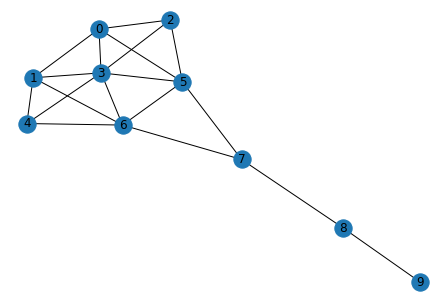

In [4]:
# Drawing
nx.draw(GK, with_labels = 1)

II. Which are the most important nodes in the Kite Graph based on the Degree Centrality?

In [5]:
# degree_centrality
degree_centrality = nx.degree_centrality(GK)
print("degree_centrality: {}".format(degree_centrality))

degree_centrality: {0: 0.4444444444444444, 1: 0.4444444444444444, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.3333333333333333, 5: 0.5555555555555556, 6: 0.5555555555555556, 7: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.1111111111111111}


<center>
    <h4>
        <span style="color:green">
            The node 3 has the highest degree centrality.
        </span>
    </h4>
</center>

In Directed Networks, the in-degree and out-degree can be obtained as follows:
```Python
indegC = nx.in_degree_centrality(Graph)
outdegC = nx.out_degree_centrality(Graph)
```

### Closeness Centrality
III. Recreate a NetworkX Graph and compute the Closeness Centraliy of node 1:
<img src="fig3.png" width="180"> </img>

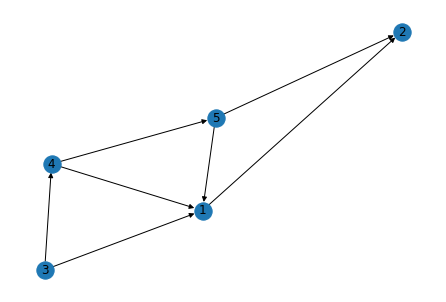

In [6]:
# Initialize the graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(range(1,6))

# Add edges
edges = [(1,2), (5,1), (5,2), (4,5), (3,4), (3,1), (4,1)]
G.add_edges_from(edges)

# Draw Graph
nx.draw(G, with_labels = 1)

In [7]:
# closeness centrality Networkx
closeness = nx.closeness_centrality(G, u = 1)
print("clossenes centrality of node 1: {}".format(closeness))

clossenes centrality of node 1: 0.75


IV. Which are the most important nodes in the Kite Graph based on the Closeness Centrality?

In [8]:
# closeness centrality of kite Graph
closeness_all = nx.closeness_centrality(GK)
closeness_all

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

<center>
    <h4>
        <span style="color:green">
            The most the most important nodes are 5 and 6.
        </span>
    </h4>
</center>

### Betweeness Centrality
V. Recreate a NetworkX Graph for the following graph and find the node with the highest Betweenness Centrality:
<img src="fig2.png" width="180"> </img>

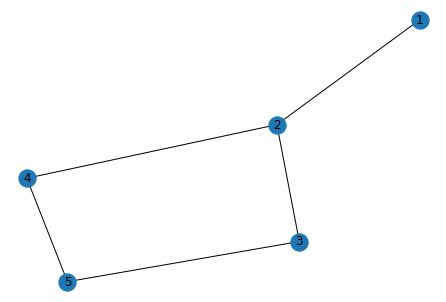

In [9]:
# Initialize the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(range(1,6))

# Add edges
edges = [(1,2), (2,3), (2,4), (4,5), (3,5)]
G.add_edges_from(edges)

# Draw network
nx.draw(G, with_labels = 1)

In [10]:
# Betweeness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("betweenness_centrality: {}".format(betweenness_centrality))

betweenness_centrality: {1: 0.0, 2: 0.5833333333333333, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.08333333333333333}


<center>
    <h4>
        <span style="color:green">
            The node with the highest Betweeness Centrality is the node 2.
        </span>
    </h4>
</center>

Compute $C_{btw}$ of all nodes can be very computationally expensive. Instead computing $C_{btw}$ with all pairs of nodes. It can bet approximated using a sample of nodes (k). 
```Python
btwC_G = nx.betweenness_centrality(G, k = 25)
```

VI. Which are the most important nodes in the Kite Graph based on the Betweenness Centrality?

In [11]:
# Betweeness Centrality Kite Graph
betweenness_GK = nx.betweenness_centrality(GK)
betweenness_GK

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

<center>
    <h4>
        <span style="color:green">
            The node with the highest Betweeness Centrality is the node 7.
        </span>
    </h4>
</center>

VII. Elaborate a Comparative Table of the most important nodes (1st, 2nd and 3rd) in the Kite Graph. In case of tie, include all nodes with the same centrality value.

In [12]:
# Degree Centrality
degree_GK = nx.degree_centrality(GK)
degree_GK

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

In [13]:
# Closeness Centrality
closeness_GK = nx.closeness_centrality(GK)
print(closeness_GK)

{0: 0.5294117647058824, 1: 0.5294117647058824, 2: 0.5, 3: 0.6, 4: 0.5, 5: 0.6428571428571429, 6: 0.6428571428571429, 7: 0.6, 8: 0.42857142857142855, 9: 0.3103448275862069}


In [14]:
# Betweeness Centrality
betweenness_GK = nx.betweenness_centrality(GK)
betweenness_GK

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [15]:
# Comparative table
node0 = [degree_GK[0], closeness_GK[0], betweenness_GK[0]]
node1 = [degree_GK[1], closeness_GK[1], betweenness_GK[1]]
node2 = [degree_GK[2], closeness_GK[2], betweenness_GK[2]]
node3 = [degree_GK[3], closeness_GK[3], betweenness_GK[3]]
node4 = [degree_GK[4], closeness_GK[4], betweenness_GK[4]]
node5 = [degree_GK[5], closeness_GK[5], betweenness_GK[5]]
node6 = [degree_GK[6], closeness_GK[6], betweenness_GK[6]]
node7 = [degree_GK[7], closeness_GK[7], betweenness_GK[7]]
node8 = [degree_GK[8], closeness_GK[8], betweenness_GK[8]]
node9 = [degree_GK[9], closeness_GK[9], betweenness_GK[9]]

index = ["Degree Centrality", "Closeness Centrality", "Betweenness Centrality"]
data = zip(node0, node1, node2, node3, node4, node5, node6, node7, node8, node9)
columns = ["Node 0", "Node 1", "Node 2","Node3", "Node4", "Node 5", "Node 6", "Node 7", "Node 8", "Node 9"]

df = pd.DataFrame(data = data, columns = columns, index = index).T
df

,Degree Centrality,Closeness Centrality,Betweenness Centrality
Node 0,0.444444,0.529412,0.023148
Node 1,0.444444,0.529412,0.023148
Node 2,0.333333,0.500000,0.000000
Node3,0.666667,0.600000,0.101852
Node4,0.333333,0.500000,0.000000
Node 5,0.555556,0.642857,0.231481
Node 6,0.555556,0.642857,0.231481
Node 7,0.333333,0.600000,0.388889
Node 8,0.222222,0.428571,0.222222
Node 9,0.111111,0.310345,0.000000


In [16]:
def highlight_max(s):

    is_max = s == s.max()
    return ['font-weight: bold' if x else '' for x in is_max]

df_style = df.style.apply(highlight_max)
df_style

,Degree Centrality,Closeness Centrality,Betweenness Centrality
Node 0,0.444444,0.529412,0.023148
Node 1,0.444444,0.529412,0.023148
Node 2,0.333333,0.500000,0.000000
Node3,0.666667,0.600000,0.101852
Node4,0.333333,0.500000,0.000000
Node 5,0.555556,0.642857,0.231481
Node 6,0.555556,0.642857,0.231481
Node 7,0.333333,0.600000,0.388889
Node 8,0.222222,0.428571,0.222222
Node 9,0.111111,0.310345,0.000000


## B. Eigenvector and Katz Centrality [30 pts]
In this section, you will obtain the **Eigenvector and Katz Centrality** for small networks. Additionally, you will compare this results with the theoretical description. 

The section is based on the chapter Zafarani, Reza et. al. (2014). *Network Measures from Social Media Mining.* Cambridge University Press.

### Eigenvector Centrality
VIII. Consider the following network:
<img src="fig4.png" width="180"> </img>
Represent it using NetworkX and its adjacency matrix using Numpy (Be careful about the order in the matrix).

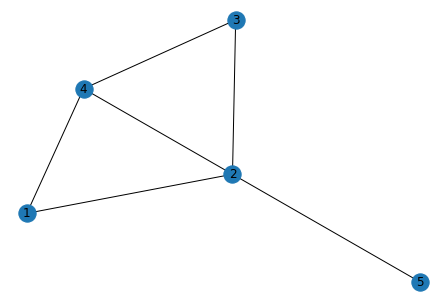

In [17]:
# Initialize Graph
G3 = nx.Graph()

# Add nodes
G3.add_nodes_from(range(1,6))

# Add edges
G3_edges = [(1,2), (1,4), (2,4), (2,3), (3,4), (2,5)]
G3.add_edges_from(G3_edges)

# Draw
nx.draw(G3, with_labels = 1)

In [18]:
# Adjacent matrix using Numpy
np_adjacent_matrix = np.array([[0., 1., 0., 1., 0.],
                               [1., 0., 1., 1., 1.],
                               [0., 1., 0., 1., 0.],
                               [1., 1., 1., 0., 0.],
                               [0., 1., 0., 0., 0.]
                              ])
np_adjacent_matrix

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1.],
       [0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [19]:
# Adjacent matrix using Networkx
nx_adjacency_matrix = nx.adjacency_matrix(G3)
nx_adjacency_matrix.todense()

matrix([[0., 1., 0., 1., 0.],
        [1., 0., 1., 1., 1.],
        [0., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

IX. Obtain the Eigenvector Centrality using NetworkX.

In [20]:
Evector = nx.eigenvector_centrality(G3)
Evector

{1: 0.41191709737006765,
 2: 0.5825392535755105,
 3: 0.41191709737006765,
 4: 0.5236826290621273,
 5: 0.21691733875073665}

X. Obtain the Eigenvector Centrality using the Matrix Definition.

In [21]:
# Adjacent matrix
#GE_adjacent_matrix = nx.adjacency_matrix(G3).todense()
GE_adjacent_matrix = nx.to_scipy_sparse_matrix(G3, nodelist=list(G3), dtype=float)

# Eigen vectors and values
e_value, e_vector = linalg.eigs(GE_adjacent_matrix.T, k=1, which="LR")

# Largest
largest = e_vector.flatten().real

# Normalize
norm = np.sign(largest.sum()) * sp.linalg.norm(largest)

dict(zip(G3, largest / norm))

{1: 0.41191727694049685,
 2: 0.5825389996250451,
 3: 0.41191727694049707,
 4: 0.5236829442247816,
 5: 0.21691657788137747}

### Katz Centrality

XI. Obtain the Katz Centrality using NetworkX considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [22]:
katz = nx.katz_centrality(G3, alpha = 0.25, beta = 0.2)
katz

{1: 0.41791649380799795,
 2: 0.5600080132056173,
 3: 0.41791649380799795,
 4: 0.5014997075105204,
 5: 0.29254175243684233}

XII. Obtain the Katz Centrality using the Matrix Definition considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [23]:
alpha=0.25
beta=0.2
G = G3

nodelist = list(G)
b = np.ones((len(nodelist), 1)) * float(beta)
A = nx.adj_matrix(G, nodelist=nodelist).todense().T
n = A.shape[0]
centrality = np.linalg.solve(np.eye(n, n) - (alpha * A), b)
norm = np.sign(sum(centrality)) * np.linalg.norm(centrality)
centrality = dict(zip(nodelist, map(float, centrality / norm)))
centrality

{1: 0.4179164805487644,
 2: 0.5600080839353443,
 3: 0.4179164805487644,
 4: 0.5014997766585173,
 5: 0.29254153638413505}

### C. Use Case:  E-mail Network [40 pts]

Consider the following E-Mail Network (Ryan A. Rossi andNesreen K. Ahmed, 2015) in a University (http://networkrepository.com/email-univ.php).

Complete the following instructions:

I. [5 pts] Compute the following Network Parameters: Number of Nodes, Number of Edges, Maximum and Minimum Degree, Average Clustering Coefficient and Transitivity.

In [24]:
email = "email-univ/email-univ.edges"

In [25]:
G_email = nx.read_edgelist(email, create_using = nx.Graph(), nodetype = int)

# Nodes email
nodes_email = G_email.number_of_nodes()
print("nodes_email: {}".format(nodes_email))

# Number of edges email
edges_email = G_email.number_of_edges()
print("edges_email: {}".format(edges_email))

# Max degree
max_degree = max(list(nx.degree_centrality(G_email).items()), key = lambda x:x[1])
print("max_degree: {}".format(max_degree))

# Min degree
min_degree = min(list(nx.degree_centrality(G_email).items()), key = lambda x:x[1])
print("min_degree: {}".format(min_degree))

# Average Clustering Coefficient email
averageClustering_email = nx.average_clustering(G_email)
print("averageClustering: {}".format(averageClustering_email))

# Transitivity
transitivity = nx.transitivity(G_email)
print("Tranistivity: {}".format(transitivity))

nodes_email: 1133
edges_email: 5451
max_degree: (105, 0.0627208480565371)
min_degree: (35, 0.0008833922261484099)
averageClustering: 0.2201760865041161
Tranistivity: 0.16625006482393817


In [26]:
index = ["Number of nodes", "Number of edges", "Max degree", "Min degree",
         "Average Clustering Coefficient", "Transitivity"]

data = (nodes_email, edges_email,max_degree[1], min_degree[1], averageClustering_email, transitivity)
columns = ["E-mail Network"]
df = pd.DataFrame(data = data, columns = columns, index = index)
df

,E-mail Network
Number of nodes,1133.000000
Number of edges,5451.000000
Max degree,0.062721
Min degree,0.000883
Average Clustering Coefficient,0.220176
Transitivity,0.166250


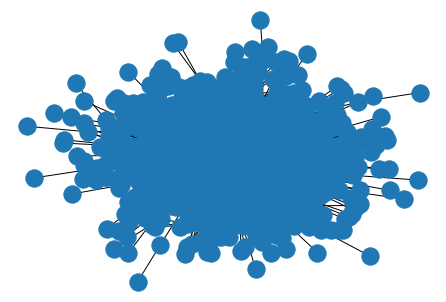

In [27]:
nx.draw(G_email)

II. [5 pts] Consider that when a student sends an email, a communication channel is created. If we consider that the information can be exchanged both ways, is it possible to go from one student/professor to every other?

Yes, the student x can send an email to everyone.

III. [30 pts]Consider you want to share a Student Promotion Code in the Network and a student needs to be selected. We expect that the student who receives it will send to her friends. Based on the following restrictions which student will you choose:

(a)  The Student Promotion Code can be forwarded to multiple users at the same time but the distance is limited to one step, i.e. if the distances is more than one step, it is no longer valid. 

(b) The distance limitation is removed, so the every student will receive the code eventually. Which node should be choosen if we want to ensure that it reaches the students in the lowest average number of emails?

(c) In order to disrupt the distribution, which students must be targeted to stop replying if we choose information-bridge students? 

- a: I would choose the node/student with the highest degree because that student has the highest number of connections in the network.

In [28]:
max_degree = max(G_email.degree(), key = itemgetter(1))
print("The student is the node: {} with {} friends.".format(max_degree[0], max_degree[1]))

The student is the node: 105 with 71 friends.


- b: The node/student with the highest closeness centrality because that node has the shortest distance to all others nodes.

In [29]:
# closeness centrality of kite Graph
closeness_centrality = nx.closeness_centrality(G_email)
max_closeness = max(closeness_centrality.items(), key =itemgetter(1))
print("The student is the node: {} with {} of Closeness Centrality".format(max_closeness[0], round(max_closeness[1], 2)))

The student is the node: 333 with 0.38 of Closeness Centrality


- c: The node/student with highest betweenness centrality becasue this node serve as a bridge between different parts of the graph.

In [30]:
# Betweeness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness = max(betweenness_centrality.items(), key =itemgetter(1))
print("The student is the node: {} with {} of Betweeness Centrality".format(max_betweenness[0], round(max_betweenness[1], 2)))

The student is the node: 2 with 0.58 of Betweeness Centrality


**NOTE** An interesting use case can be found in Chapter: Centrality, Power and Bottlenecks from Social Network Analysis for Startups. Maksim Tsvetovat & Alexander Kouznetsou (2011) Social Network Analysis for Startups.

## References
Problem C. Use Case: E-mail Network is based on an exersice on Applied Social Network Analysis in Python at Coursera.